# Machine Learning 201

##  Linear Regression Models

* Simple Linear Regression Models 
* Multiple Linear Regression Models 
* Ridge Regression
* Lasso Regression
* Elastic Net Regression

## Simple Linear Regression Models 

* Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.
* Amaç, değişkenler arasındaki ilişkiyi modelemektir.
* Modellemek, çeşitli kavramlar arasındaki ilişkileri belirli matematiksel formlarda ifade etmek demektir.
* Simple Linear Regression'u yaptığımızda en son elimzde kalan denklem : ý = b0 + b1x
* x bağımsız değişken değerleri. b0 ve b1 veri setinin içerisinden bulmamız gereken parametrelerdir, ý ise tahmin edilen değerleri ifade eder.

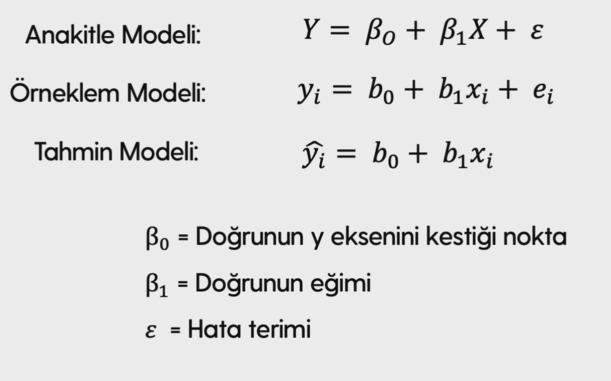

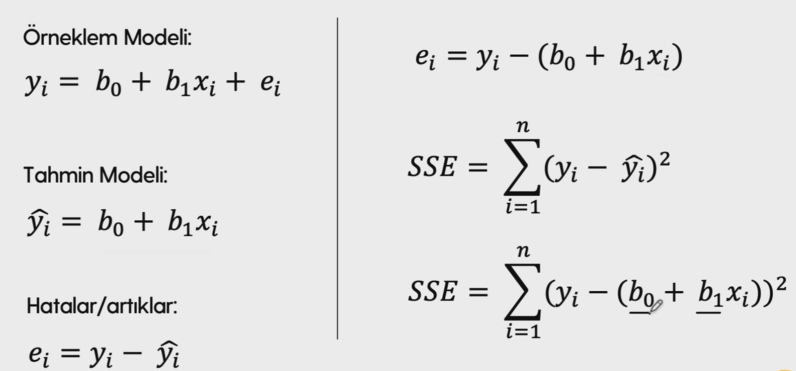

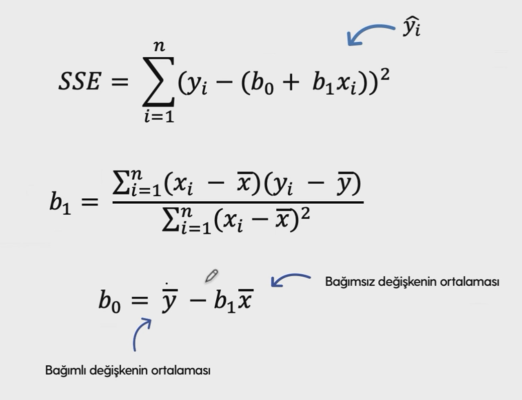

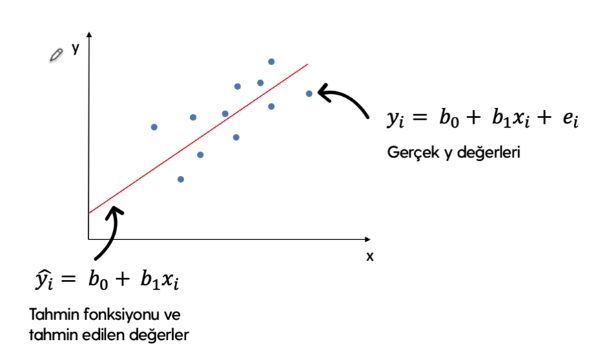

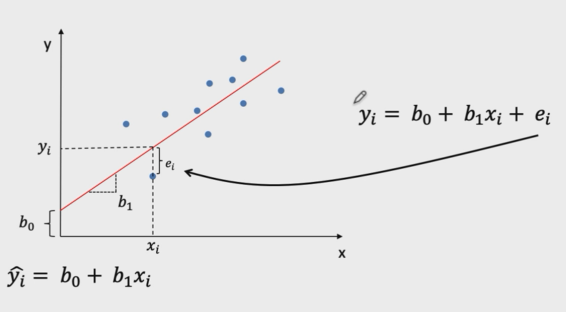

### Model

In [12]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:5] # index değerlerini gözlem olarak alan veri setini düzelttik
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# bağımlı değişken sales, bağımsız değişken ise diğer değişkenlerdir

In [13]:
# simple linear regression ile ilgilendiğimiz için değişkenlerden bir tansesi seçeceğiz

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
import seaborn as sns

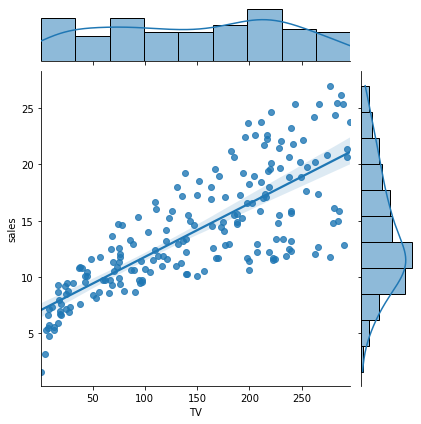

In [18]:
sns.jointplot(x = "TV", y = "sales",data = df, kind = "reg");
# x eksenine bağımsız, y eksenine bağımlı değişken girilir, tip olarak da regresyon seçilir

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X = df[["TV"]]

In [22]:
Y = df[["sales"]]

In [23]:
reg = LinearRegression()

In [24]:
model = reg.fit(X,Y) # modeli kur

In [25]:
model

LinearRegression()

In [26]:
str(model)

'LinearRegression()'

In [27]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [28]:
model.intercept_ # b0 değeri (sabit)

array([7.03259355])

In [29]:
model.coef_ #b1 değeri

array([[0.04753664]])

In [30]:
#rkare = Bağımlı değişkendeki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesidir.
model.score(X,Y)

0.611875050850071

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


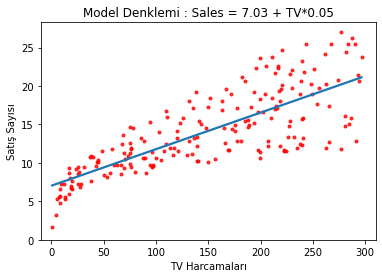

In [36]:
import matplotlib.pyplot as plt
#ci=None güven aralığı koyma demektir
g = sns.regplot(df["TV"], df["sales"], ci= None, scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi : Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

### Tahmin 

In [37]:
model.predict([[165]]) # tahmin et (bağımsız değişken değerini bekler ve bağımlı değişkeni tahmin eder)

array([[14.87613922]])

In [38]:
yeni_veri = [[5],[15],[30]]

In [39]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

### Artıklar 

* MSE : Hata kareler ortalaması
* RMSE : Hata kareler ortalmasının karekökü

In [43]:
Y.head(10) # gerçek değerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [42]:
model.predict(X)[0:10] # tahmin edilen değerler

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [44]:
gercek_y = Y.head(10)

In [45]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [46]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y],axis = 1)

In [51]:
hatalar.columns = ["gercek_y","tahmin_edilen_y"]

In [52]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [53]:
hatalar["artık"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [54]:
hatalar

,gercek_y,tahmin_edilen_y,artık
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [55]:
hatalar["artık_kareler"] = hatalar["artık"]**2

In [56]:
hatalar

,gercek_y,tahmin_edilen_y,artık,artık_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [58]:
import numpy as np
np.mean(hatalar["artık_kareler"])

9.290350329638105